<a href="https://colab.research.google.com/github/NDsasuke/Classification-Regression-Clustering/blob/main/Clustering/Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import necessary libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

Preprocessing

In [ ]:
# Online dataset URL
url = "https://raw.githubusercontent.com/SteffiPeTaffy/machineLearningAZ/master/Machine%20Learning%20A-Z%20Template%20Folder/Part%204%20-%20Clustering/Section%2025%20-%20Hierarchical%20Clustering/Mall_Customers.csv"

# Read dataset
data = pd.read_csv(url)

# Let's only consider two features for simplicity: 'Annual Income' and 'Spending Score'
X = data[['Annual Income (k$)', 'Spending Score (1-100)']].values

Model Building

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

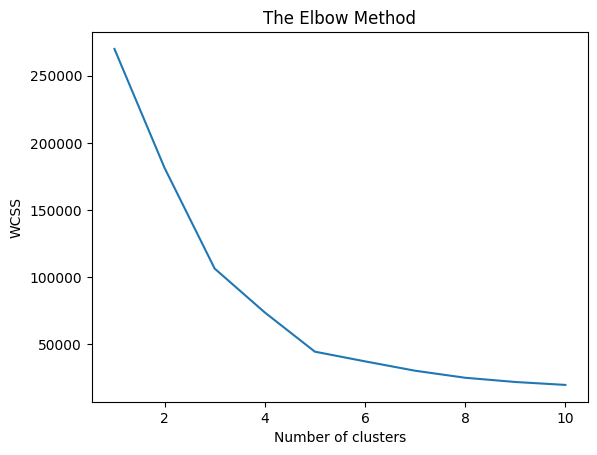

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


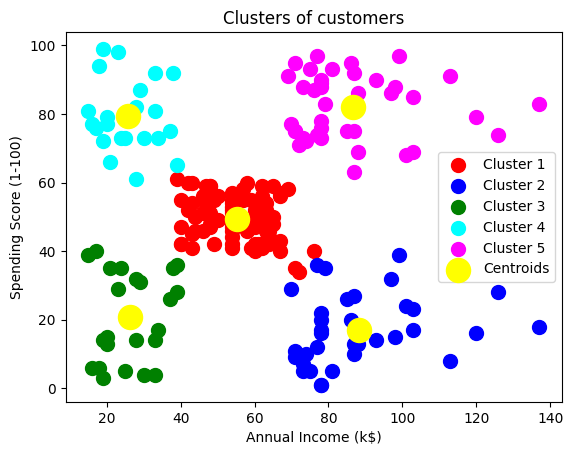

In [1]:
# Using the Elbow Method to find the optimal number of clusters
wcss = [] # Within-Cluster-Sum-of-Squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Fit K-Means to the dataset
# Let's assume optimal clusters from Elbow Method is 5
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Visualize the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()


In [2]:
# Create a copy of the data and add the cluster labels as a new column
data_with_clusters = data.copy()
data_with_clusters['Cluster'] = y_kmeans

# Display the mean values of each cluster
cluster_characteristics = data_with_clusters.groupby(['Cluster']).mean()
print(cluster_characteristics)

# Display the size of each cluster
cluster_size = data_with_clusters['Cluster'].value_counts()
print("\nCluster Sizes:")
print(cluster_size)

# For more detailed exploration, you can even check clusters one by one.
# Here's how you can display data for the first cluster
print("\nCluster 1:")
print(data_with_clusters[data_with_clusters['Cluster'] == 0])


         CustomerID        Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                                   
0         86.320988  42.716049           55.296296               49.518519
1        164.371429  41.114286           88.200000               17.114286
2         23.000000  45.217391           26.304348               20.913043
3         23.090909  25.272727           25.727273               79.363636
4        162.000000  32.692308           86.538462               82.128205

Cluster Sizes:
0    81
4    39
1    35
2    23
3    22
Name: Cluster, dtype: int64

Cluster 1:
     CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)  \
43           44  Female   31                  39                      61   
46           47  Female   50                  40                      55   
47           48  Female   27                  40                      47   
48           49  Female   29                  40                      42   

<ipython-input-2-3dea81e0ccb7>:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_characteristics = data_with_clusters.groupby(['Cluster']).mean()


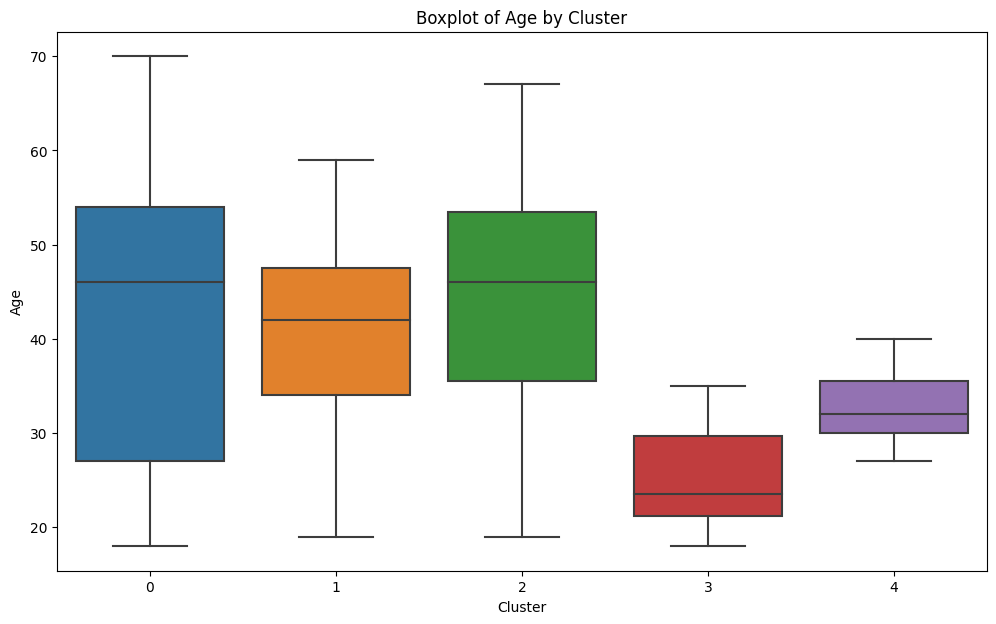

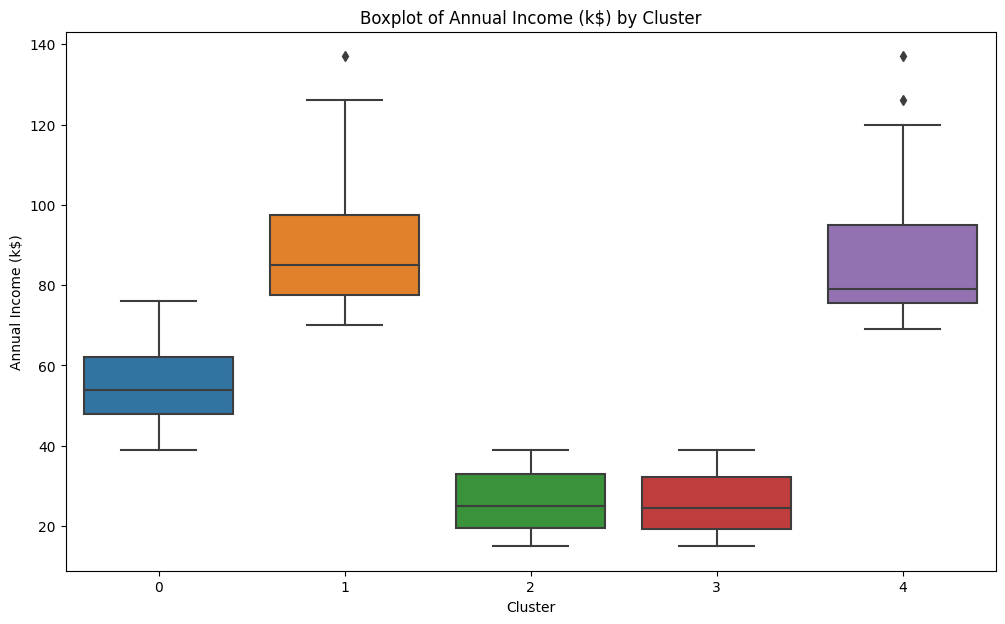

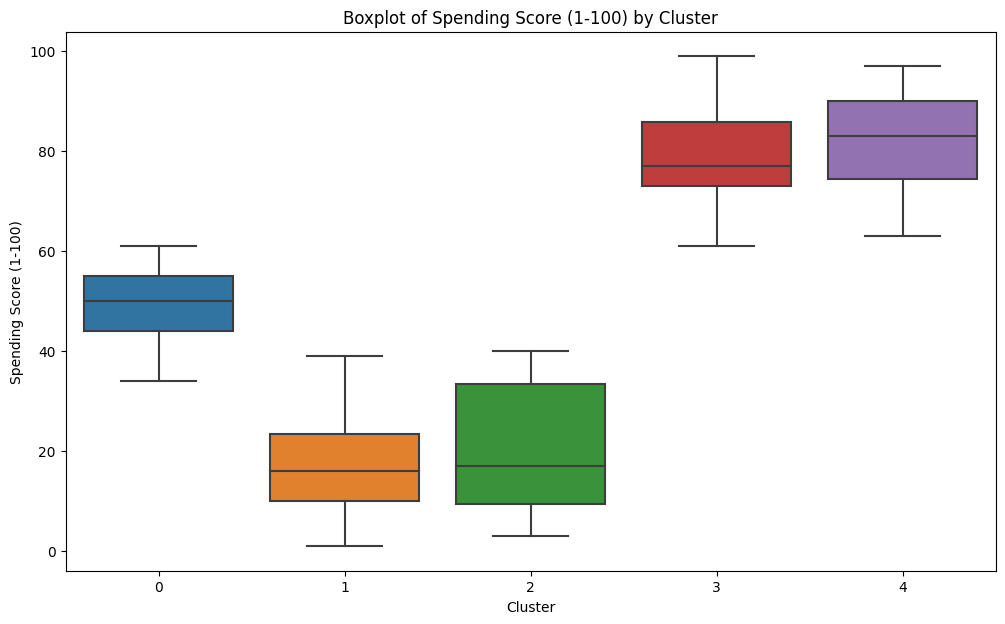

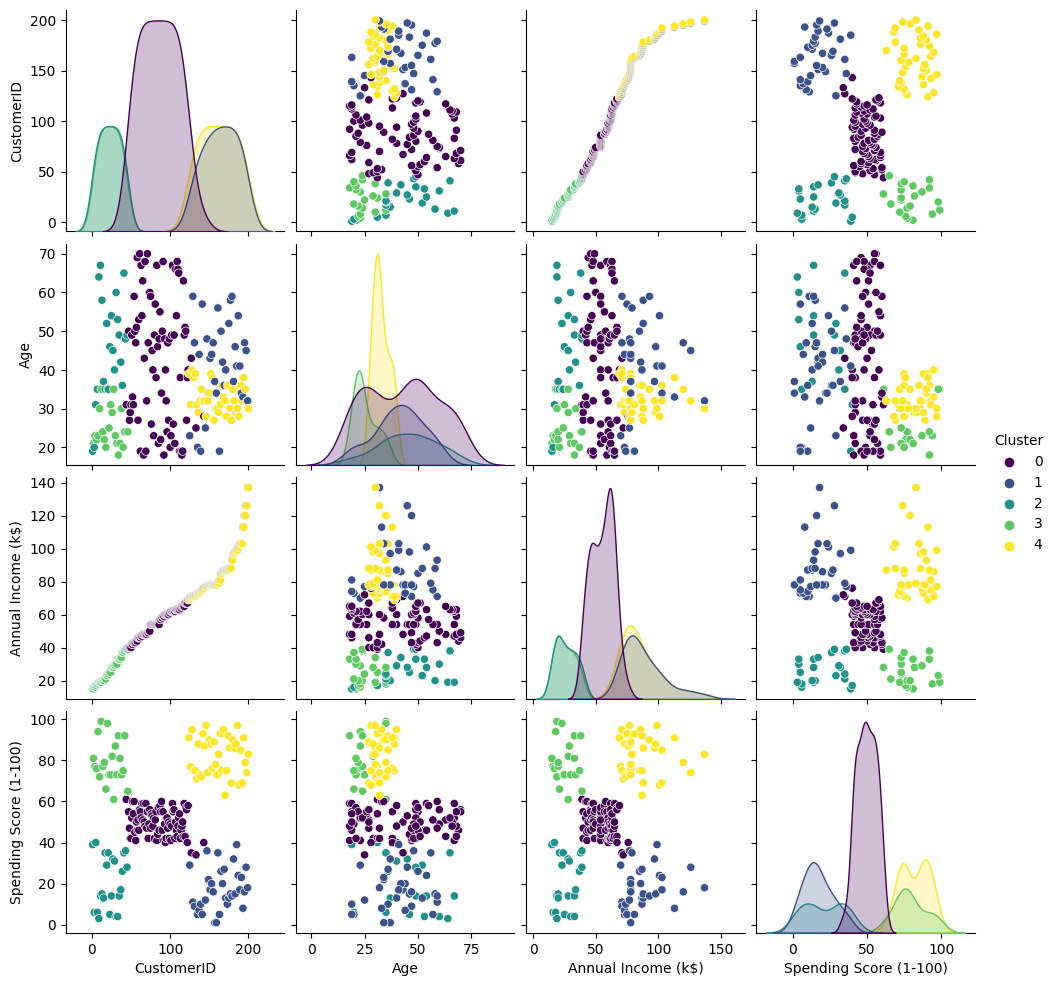

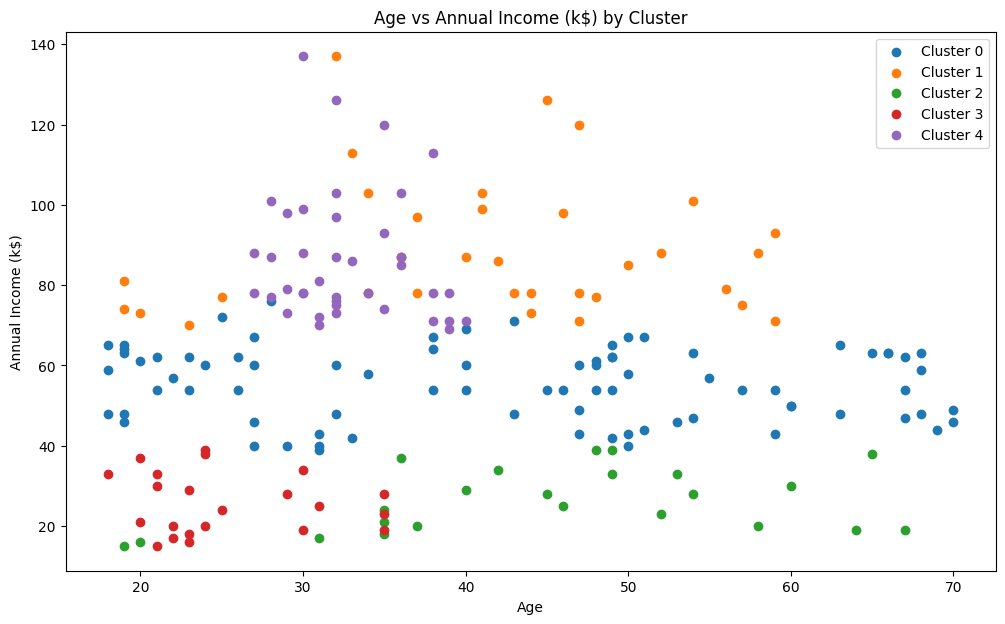

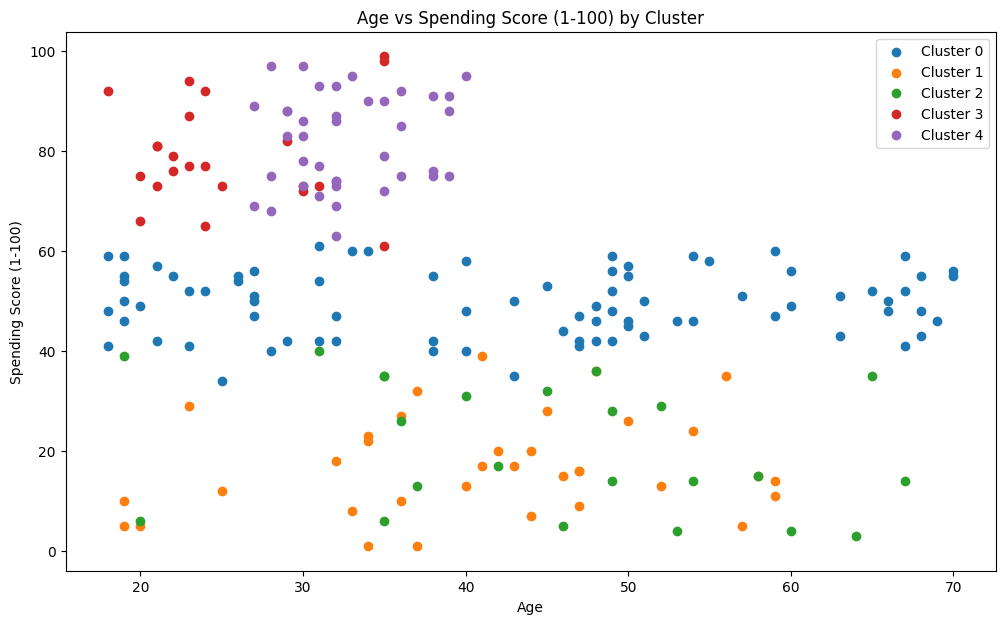

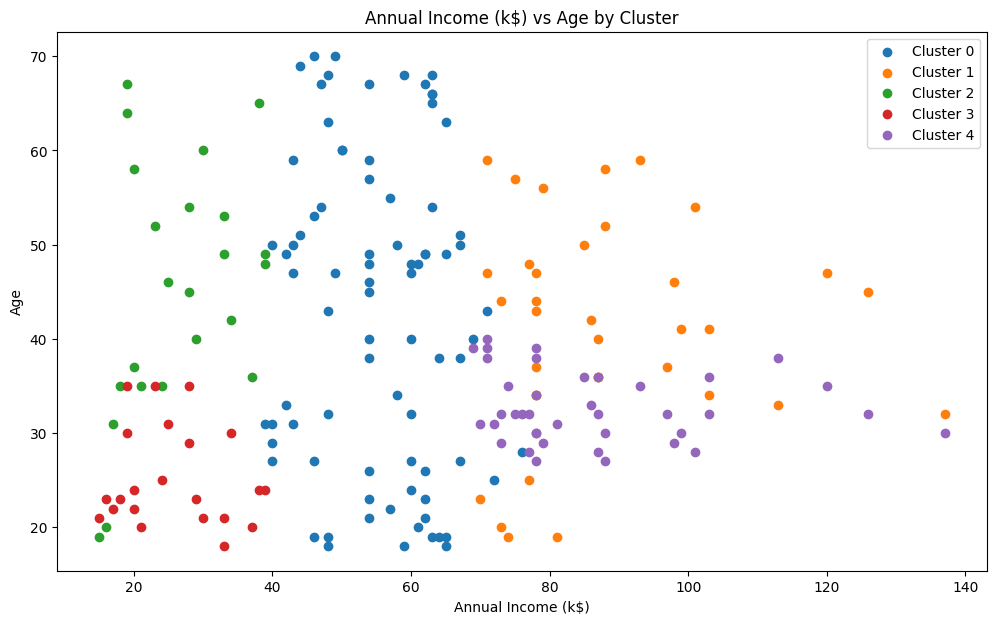

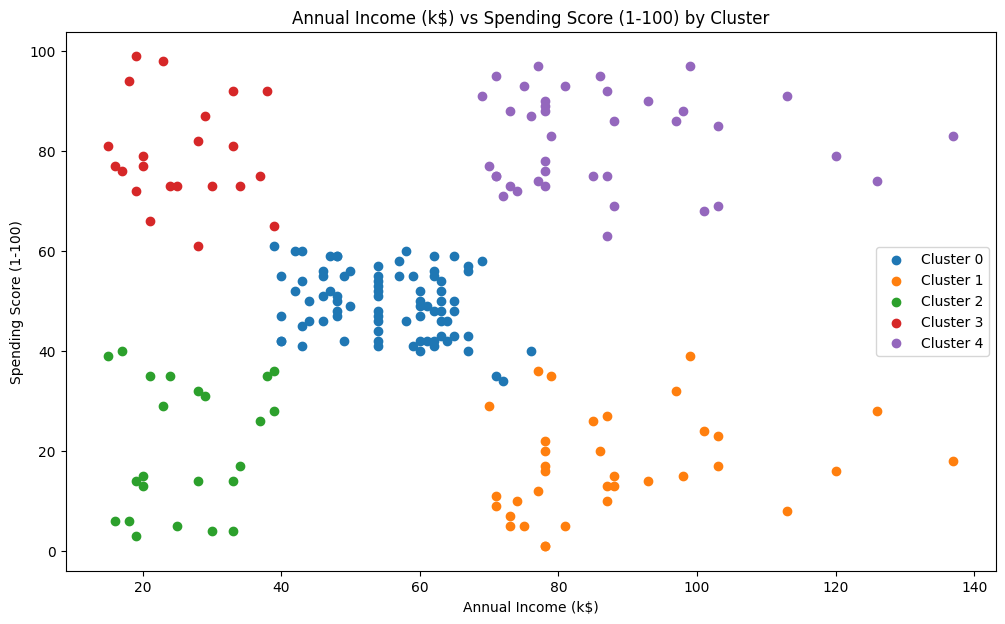

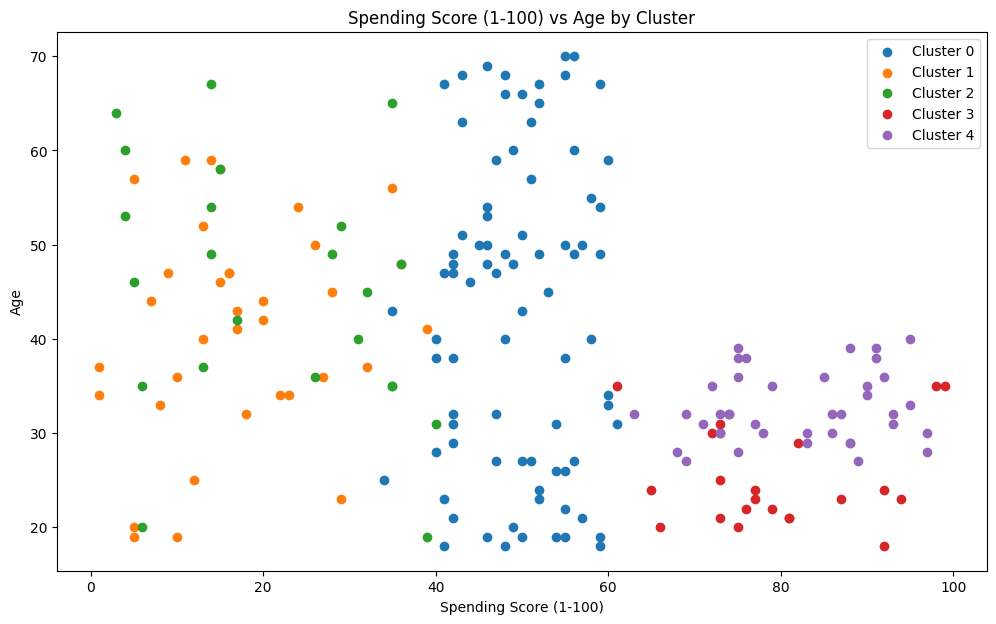

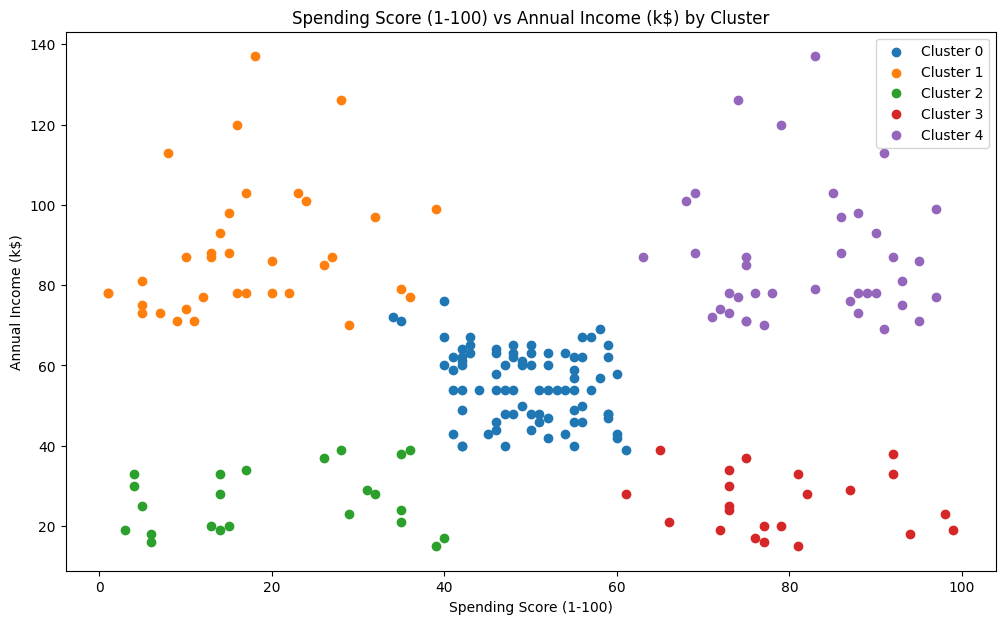

In [3]:
import seaborn as sns

# Boxplot for each attribute by cluster
for col in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    plt.figure(figsize=(12, 7))
    sns.boxplot(x='Cluster', y=col, data=data_with_clusters)
    plt.title(f'Boxplot of {col} by Cluster')
    plt.show()

# Pairplot colored by cluster
sns.pairplot(data_with_clusters, hue='Cluster', palette='viridis')
plt.show()

# Scatter plots for pairs of attributes
for col1 in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    for col2 in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
        if col1 != col2:
            plt.figure(figsize=(12, 7))
            for cluster in range(5):
                plt.scatter(data_with_clusters[data_with_clusters['Cluster'] == cluster][col1],
                            data_with_clusters[data_with_clusters['Cluster'] == cluster][col2],
                            label=f'Cluster {cluster}')
            plt.xlabel(col1)
            plt.ylabel(col2)
            plt.legend()
            plt.title(f'{col1} vs {col2} by Cluster')
            plt.show()
